# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Henry | Normanyo | Henry Normanyo | 5 | 25% |
| Member 2: | Haroon | Yaseen | Haroon Yaseen | 5 | 25% |
| Member 3: | Muhammad | Talha Alvi | Muhammad Talha Alvi | 5 | 25% |
| Member 4: | James | Inedu | James Inedu | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

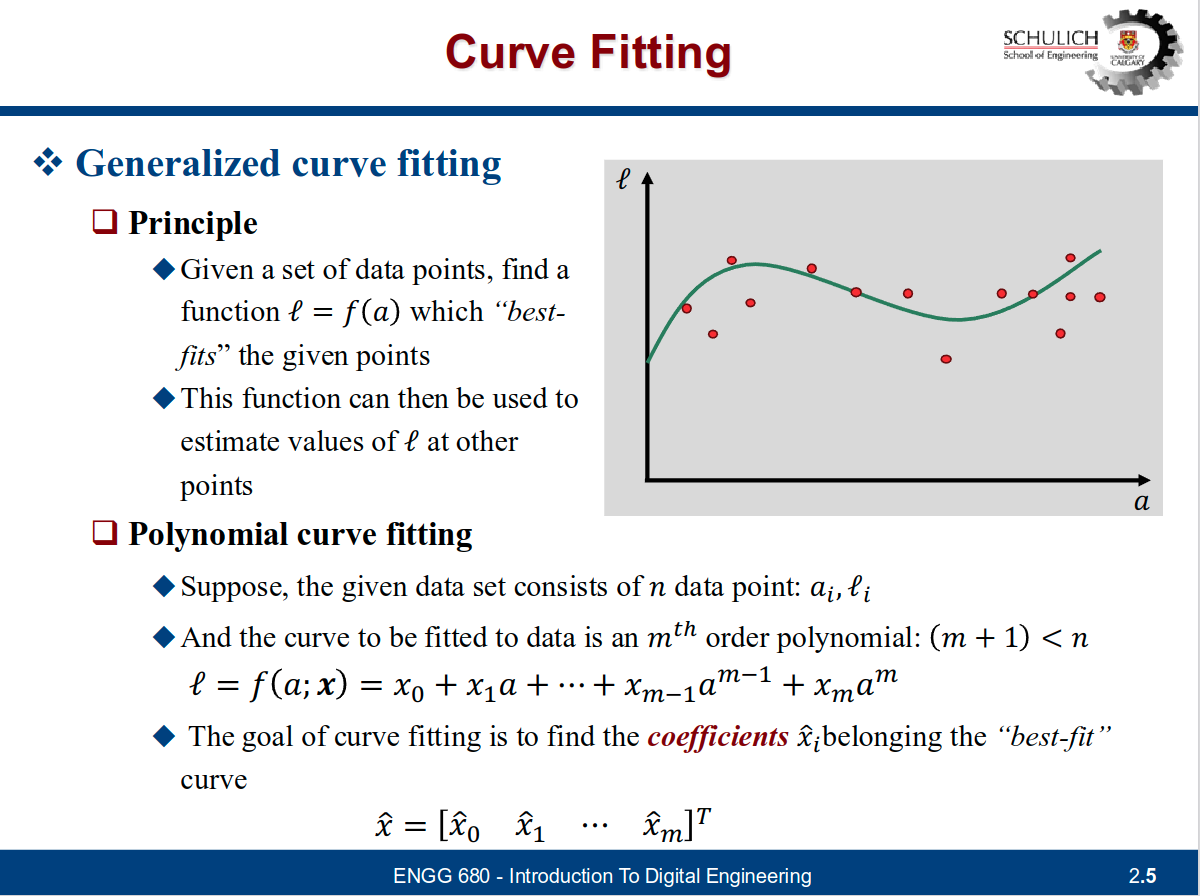

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [25]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:, 2]

In [27]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)


# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


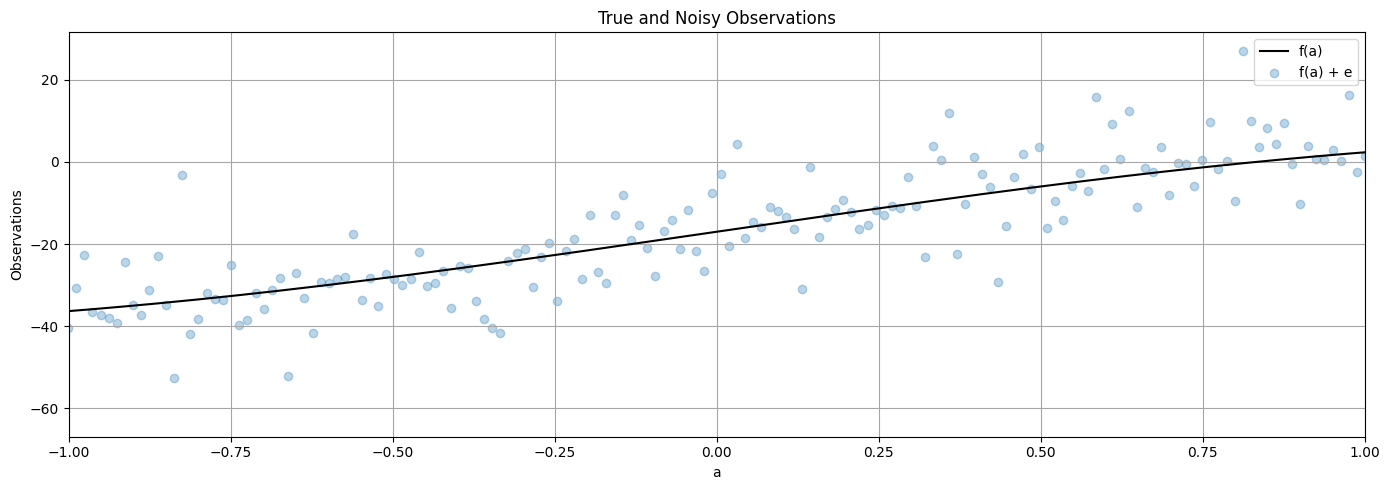

In [41]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment

# Note: The x-axis is currently scaled from -1 to 1 for simplicity in visualization.
# Ideally, the x-axis should be scaled from -π to π, as per the problem statement
# which specifies that the observations are values of f(a) in the range -π to π.
# This simplification has been made for ease of comparison, but can be adjusted
# by setting the limits to [start, end] where start = -π and end = π.
# (2 marks)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label="f(a)", color='k')

# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

ax.set_xlabel('a')
ax.set_ylabel('Observations')

ax.set_title('True and Noisy Observations')

ax.legend()

ax.set_xlim([-1, 1])

ax.grid(True, which='both', ls='-', color='0.65')

fig.tight_layout()

plt.show()

In [30]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)
import numpy as np

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    A = np.vander(a, N=deg+1, increasing=True)

    At_P_A = A.T @ P @ A
    At_P_l = A.T @ P @ l

    x = np.linalg.solve(At_P_A, At_P_l)

    v = l - A @ x

    n = len(l)
    apv = (v.T @ P @ v) / (n - deg - 1)

    cov_x = apv * np.linalg.inv(At_P_A)

    return (x, cov_x, apv, v)


In [31]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# This function will be used later to manually evaluate the polynomial using the estimated coefficients
def evaluate_polynomial(x: np.ndarray, a: np.ndarray) -> np.ndarray:
    '''
    Args:
        x:              estimated polynomial coefficients
        a:              function input (constants)
    Returns:
        polynomial_values: Values of the polynomial evaluated at points in a
    '''
    # Create design matrix based on polynomial degree
    A = np.vander(a, N=len(x), increasing=True)
    return A @ x

# Polynomial degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Polynomial degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Polynomial degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)


In [32]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = evaluate_polynomial(x_deg1, a)
cubic_uw = evaluate_polynomial(x_deg3, a)
quintic_uw = evaluate_polynomial(x_deg5, a)

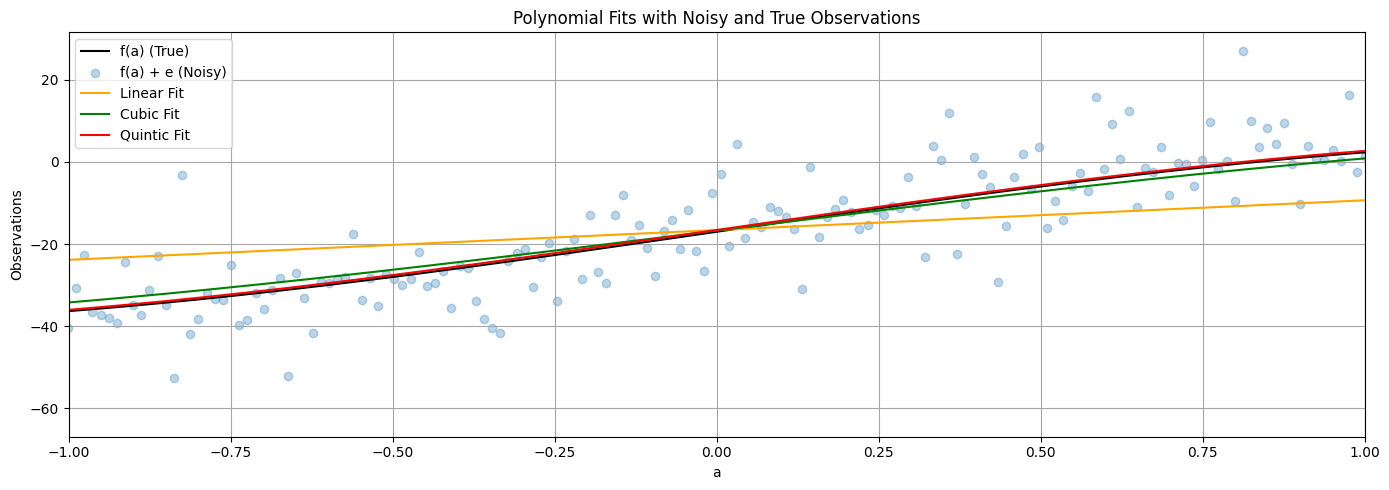

In [33]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label="f(a) (True)", color='k')

ax.scatter(a, l, label="f(a) + e (Noisy)", color='tab:blue', marker='o', alpha=0.3)

ax.plot(a, line_uw, label="Linear Fit", color='orange')
ax.plot(a, cubic_uw, label="Cubic Fit", color='green')
ax.plot(a, quintic_uw, label="Quintic Fit", color='red')

ax.set_xlabel('a')
ax.set_ylabel('Observations')

ax.set_title('Polynomial Fits with Noisy and True Observations')

ax.legend()

ax.set_xlim([-1, 1])


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

plt.show()

In [34]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A posteriori variance factor for Linear Fit (deg 1):", apv_deg1)
print("A posteriori variance factor for Cubic Fit (deg 3):", apv_deg3)
print("A posteriori variance factor for Quintic Fit (deg 5):", apv_deg5)

A posteriori variance factor for Linear Fit (deg 1): 162.742608604322
A posteriori variance factor for Cubic Fit (deg 3): 66.13227783131883
A posteriori variance factor for Quintic Fit (deg 5): 63.7583446301842


In [35]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_linear = np.linalg.norm(line_uw - l_true)

norm_cubic = np.linalg.norm(cubic_uw - l_true)

norm_quintic = np.linalg.norm(quintic_uw - l_true)

print("Norm between Linear Fit and True Observations:", norm_linear)
print("Norm between Cubic Fit and True Observations:", norm_cubic)
print("Norm between Quintic Fit and True Observations:", norm_quintic)

Norm between Linear Fit and True Observations: 229.0601679674409
Norm between Cubic Fit and True Observations: 38.285979929116664
Norm between Quintic Fit and True Observations: 17.36996719696645


In [36]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
norm_linear = np.linalg.norm(line_uw - l_true)

norm_cubic = np.linalg.norm(cubic_uw - l_true)

norm_quintic = np.linalg.norm(quintic_uw - l_true)

print("Norm between Linear Fit and True Observations:", norm_linear)
print("Norm between Cubic Fit and True Observations:", norm_cubic)
print("Norm between Quintic Fit and True Observations:", norm_quintic)

Norm between Linear Fit and True Observations: 229.0601679674409
Norm between Cubic Fit and True Observations: 38.285979929116664
Norm between Quintic Fit and True Observations: 17.36996719696645


In [37]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

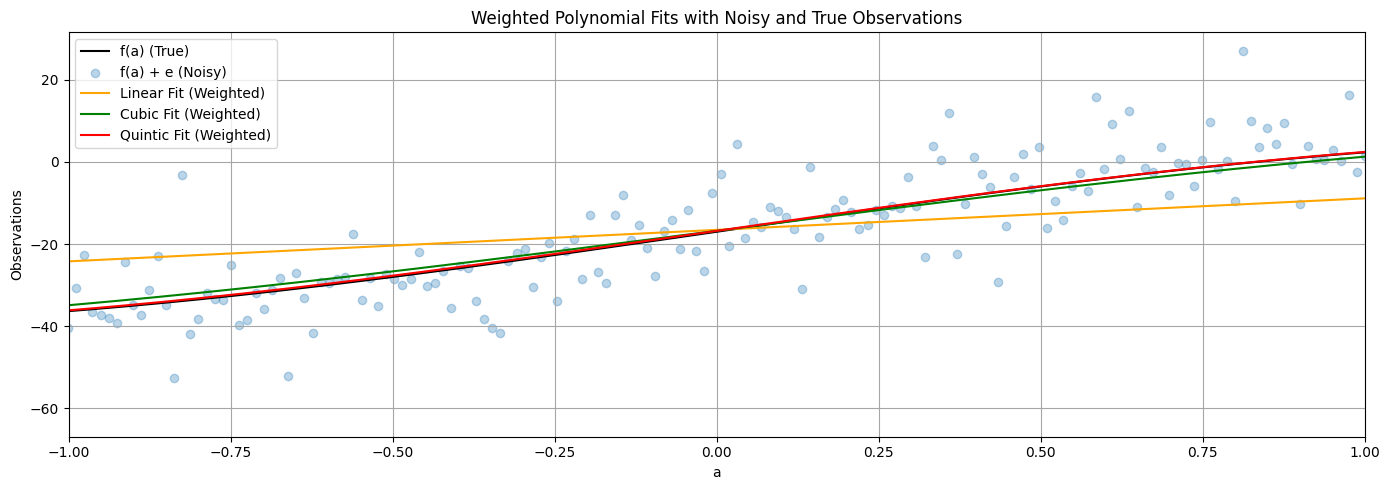

A posteriori variance factor for Linear Fit (Weighted, deg 1): 12.054651233436907
A posteriori variance factor for Cubic Fit (Weighted, deg 3): 1.1444647026537131
A posteriori variance factor for Quintic Fit (Weighted, deg 5): 0.9447009043856552
Norm between Linear Fit (Weighted) and True Observations: 230.67760813832942
Norm between Cubic Fit (Weighted) and True Observations: 36.07026687266801
Norm between Quintic Fit (Weighted) and True Observations: 5.7416069158864955


In [38]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Step 6: Call fit_polynomial_curve with different polynomial degrees using the proper P matrix
# Polynomial degree 1 (with weighted P)
x_deg1_w, cov_x_deg1_w, apv_deg1_w, v_deg1_w = fit_polynomial_curve(a, l, P, deg=1)

# Polynomial degree 3 (with weighted P)
x_deg3_w, cov_x_deg3_w, apv_deg3_w, v_deg3_w = fit_polynomial_curve(a, l, P, deg=3)

# Polynomial degree 5 (with weighted P)
x_deg5_w, cov_x_deg5_w, apv_deg5_w, v_deg5_w = fit_polynomial_curve(a, l, P, deg=5)

# Step 7: Construct polynomial functions using the estimated coefficients (weighted)

# For degree 1 (line: linear polynomial)
line_w = np.polyval(np.flip(x_deg1_w), a)

# For degree 3 (cubic polynomial)
cubic_w = np.polyval(np.flip(x_deg3_w), a)

# For degree 5 (quintic polynomial)
quintic_w = np.polyval(np.flip(x_deg5_w), a)

# Step 8: Plot the weighted polynomials, noisy observations, and true observations

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label="f(a) (True)", color='k')

ax.scatter(a, l, label="f(a) + e (Noisy)", color='tab:blue', marker='o', alpha=0.3)

ax.plot(a, line_w, label="Linear Fit (Weighted)", color='orange')
ax.plot(a, cubic_w, label="Cubic Fit (Weighted)", color='green')
ax.plot(a, quintic_w, label="Quintic Fit (Weighted)", color='red')

ax.set_xlabel('a')
ax.set_ylabel('Observations')

ax.set_title('Weighted Polynomial Fits with Noisy and True Observations')

ax.legend()

ax.set_xlim([-1, 1])

ax.grid(True, which='both', ls='-', color='0.65')

fig.tight_layout()

plt.show()

# Step 9: Print the a posteriori variance factor for each polynomial degree (weighted)

print("A posteriori variance factor for Linear Fit (Weighted, deg 1):", apv_deg1_w)
print("A posteriori variance factor for Cubic Fit (Weighted, deg 3):", apv_deg3_w)
print("A posteriori variance factor for Quintic Fit (Weighted, deg 5):", apv_deg5_w)

# Step 10: Compute and print the norm between predicted and true observations (weighted)

# Compute the norm for the Linear fit (weighted)
norm_linear_w = np.linalg.norm(line_w - l_true)

# Compute the norm for the Cubic fit (weighted)
norm_cubic_w = np.linalg.norm(cubic_w - l_true)

# Compute the norm for the Quintic fit (weighted)
norm_quintic_w = np.linalg.norm(quintic_w - l_true)

print("Norm between Linear Fit (Weighted) and True Observations:", norm_linear_w)
print("Norm between Cubic Fit (Weighted) and True Observations:", norm_cubic_w)
print("Norm between Quintic Fit (Weighted) and True Observations:", norm_quintic_w)

In [40]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
print("Comparison of Results:")
print("\nA Posteriori Variance Factor (APV):")
print(" - Unweighted LSE has higher APV because all observations are treated equally, irrespective of their variance.")
print(" - Weighted LSE has lower APV because it accounts for observation uncertainty, giving more weight to observations with lower variance.")
print("\nNorm:")
print(" - Unweighted LSE has higher norm due to the influence of noisy observations.")
print(" - Weighted LSE has lower norm as it reduces the impact of noisier observations, improving the fit.")
print("\nExplanation:")
print("Weighted LSE adjusts the influence of each observation based on its variance. This allows the model to better capture the true underlying pattern in the data by downweighting noisier observations and upweighting more reliable ones.")

Comparison of Results:

A Posteriori Variance Factor (APV):
 - Unweighted LSE has higher APV because all observations are treated equally, irrespective of their variance.
 - Weighted LSE has lower APV because it accounts for observation uncertainty, giving more weight to observations with lower variance.

Norm:
 - Unweighted LSE has higher norm due to the influence of noisy observations.
 - Weighted LSE has lower norm as it reduces the impact of noisier observations, improving the fit.

Explanation:
Weighted LSE adjusts the influence of each observation based on its variance. This allows the model to better capture the true underlying pattern in the data by downweighting noisier observations and upweighting more reliable ones.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

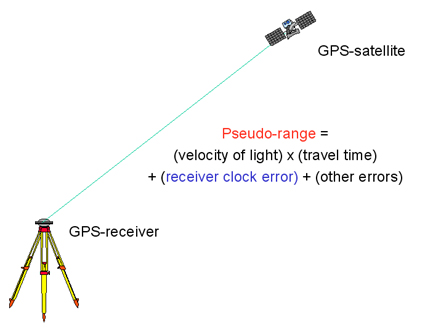

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
from google.colab import drive
drive.mount('/content/drive')
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')


pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    distances = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
    return distances


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    A = np.zeros((n, m))
    for k in range(n):
        diff = s_pos[k, 1:] - r_pos[:3]
        A[k, :3] = -diff / rho[k]
        A[k, 3] = 1
    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
tolerance = 0.001


while np.linalg.norm(delta[:3]) > tolerance:


       # compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 1] - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1
       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)





# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)


# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A)



In [ ]:
# step 10
results = {
    "Estimated states": x_hat,
    "Corrections array": delta,
    "Estimated measurements residuals": w,
    "A Posteriori Variance of Unit Weight": apv,
    "Covariance matrix of estimated states": C_x_hat,
    "Number of iterations": i,
    "3-D position errors": arr_err_pos[-1],
}

print(results)
# (7 marks)



{'Estimated states': array([-1.63349244e+06, -3.65162954e+06,  4.95248543e+06,  6.47201389e+00]), 'Corrections array': array([ 3.23113755e-06,  6.39397325e-06, -1.75963170e-05, -2.09206393e-05]), 'Estimated measurements residuals': array([ 0.25995968,  0.11116656, -1.09951518, -0.00500947,  0.2003028 ,
       -1.41816897, -0.09127866,  1.51207884,  0.26364719,  0.61137232,
       -0.34467609]), 'A Posteriori Variance of Unit Weight': 0.8852888535930045, 'Covariance matrix of estimated states': array([[ 0.31965006,  0.06966245, -0.08457202, -0.07306881],
       [ 0.06966245,  0.42546873, -0.58107148, -0.3682586 ],
       [-0.08457202, -0.58107148,  2.04560159,  1.10402067],
       [-0.07306881, -0.3682586 ,  1.10402067,  0.69925737]]), 'Number of iterations': 5, '3-D position errors': 5.431614722159558}


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states

#  A Posteriori variance close to one signifies that the model fits well, with predicted residuals closely matching the actual ones. In our case, a value of 0.885 is pretty close to 1,
# suggesting our model is performing quite well and
# The covariance matrix analysis helps assess the precision and relationships between estimated states,
# with lower variances indicating higher confidence.
# The exponential decrease in the log of misclosure and corrections against iteration number shows the model is converging,
# making the receiver's position estimate more accurate. Overall, everything is coming together nicely, with the receiver's position honing in on the true location.

# (2 marks)

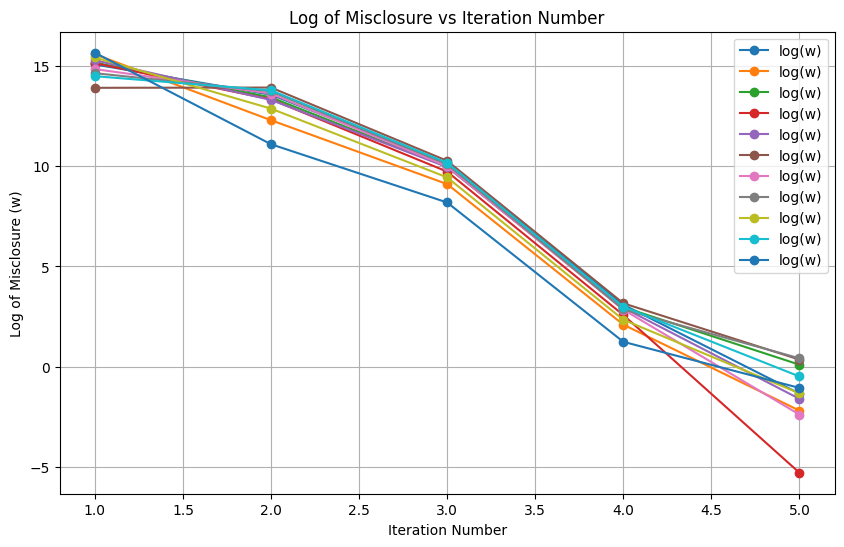

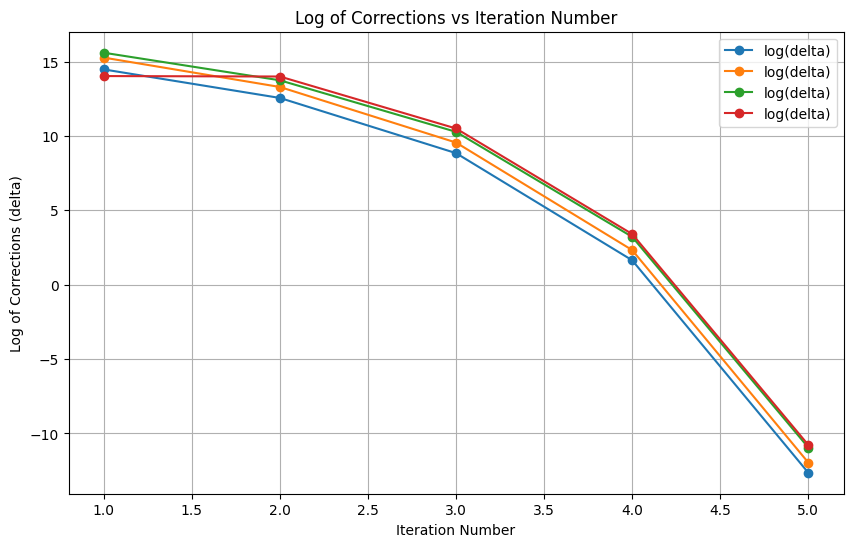

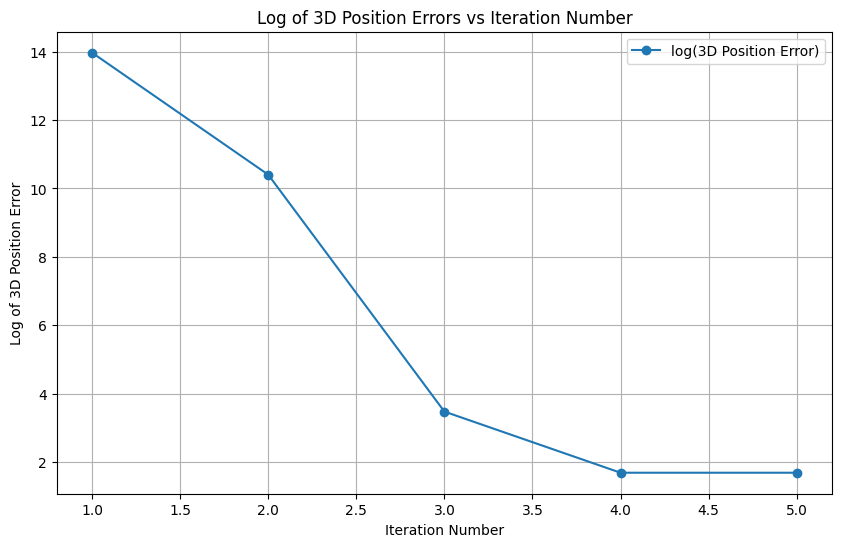

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
# 1. Plot log of the misclosure w against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_w)), label='log(w)', marker='o')
plt.title('Log of Misclosure vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure (w)')
plt.grid(True)
plt.legend()
plt.show()
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='log(delta)', marker='o')
plt.title('Log of Corrections vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections (delta)')
plt.grid(True)
plt.legend()
plt.show()
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='log(3D Position Error)', marker='o')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D Position Error')
plt.grid(True)
plt.legend()
plt.show()
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena

# When you plot the log of misclosure (w) against the number of iterations,
# you'll notice the graph begins with larger misclosure values, then steadily decreases as iterations continue.
# This drop-off happens exponentially, signaling that the model is refining in on the true state.
# In essence, the difference between what we observed and what we computed is shrinking.
# This trend tells us that the receiver's position estimates are getting more accurate,
# and the Least Squares Estimation (LSE) method is nearing its convergence point.

# When you plot the log of corrections (delta) against the number of iterations,
# you’ll see that the corrections start off large and shrink as the iterations go on.
# This gradual reduction means our estimates are becoming more accurate and stable.
# The downward trend in the plot indicates that the adjustments to the receiver's estimated position (x, y, z)
# are getting smaller and more refined as we get closer to the true solution.
# Once these corrections become small enough to be below our tolerance level, the Least Squares Estimation (LSE) algorithm stops,
# signaling that we've reached a solution.

# At the start, the 3D position error is quite large, which means our initial guess of the receiver's position is way off.
# As we go through more iterations, this error starts to shrink, indicating that our estimate is getting closer to the actual position, or GroundTruth.
# Each iteration makes our position estimate more accurate. Just like the other graphs,
# the way the error decreases logarithmically points to an exponential rate of convergence.
# This is pretty common for well-behaved Least Squares Estimation problems.
# Essentially, everything is coming together nicely, and we're zeroing in on the right location.
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
